In [1]:
#------------------Parte A-------------------#

In [8]:
#Ejercicio 1
     
import requests

#busamos algun ítem de interés: Iphone 14 pro max 
buscar = "iphone 14 pro max"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
print(response) #Correcto 

#Chequeamos que el url sea el correcto
url

#Guardamos el resultado en un diccionario (json)
data = response.json()
data                           #para ver su contenido

<Response [200]>


{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'iphone 14 pro max',
 'paging': {'total': 199, 'primary_results': 14, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1890488344',
   'title': 'Apple iPhone 14 Pro Max (128 Gb) - Negro + 85% Bateria',
   'condition': 'new',
   'thumbnail_id': '720140-MLA78622426123_082024',
   'catalog_product_id': 'MLA19615313',
   'listing_type_id': 'gold_special',
   'sanitized_title': 'apple-iphone-14-pro-max-128-gb-negro-85-bateria',
   'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1890488344-apple-iphone-14-pro-max-128-gb-negro-85-bateria-_JM',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1055',
   'domain_id': 'MLA-CELLPHONES',
   'variation_id': '184445855981',
   'thumbnail': 'http://http2.mlstatic.com/D_720140-MLA78622426123_082024-O.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 1720000,
   'original_price': None,
   'sale_price': {'price_id': '',
    'amount':

In [16]:
#Ejercicio 2

#Cantidad de Resultados que obtenemos
print('Longitud de lista de resultados:', len(data['results']))

# Veamos el precio del primer resultado de la búsqueda
print('Precio del primer resultado:', data['results'][0]['price'])


import pandas as pd

precios = []

# Extraemos los valores de 'id' y 'price' 
for i, resultado in enumerate(data['results']): 
    if 'id' in resultado and 'price' in resultado:
        precios.append([resultado['id'], resultado['price']])  # Añadir el par [id, price]
    else:
        print(f"Faltan datos en el resultado {i}: {resultado}")

# Convertimos la lista de listas en un DataFrame
df_precios = pd.DataFrame(precios, columns=['id', 'Precio'])

# Mostramos el DataFrame
print(df_precios)


#precio promedio:
print('Precio promedio:', df_precios['Precio'].mean())   #1834099.74

#precio máximo:
print('Precio máximo:',df_precios['Precio'].max())    #5999999

#precio minimo:
print('Precio minimo:',df_precios['Precio'].min())    #145000


Longitud de lista de resultados: 50
Precio del primer resultado: 1720000
               id   Precio
0   MLA1890488344  1720000
1   MLA1890309638  1720000
2   MLA1452977585  1950000
3   MLA1414395007  3000000
4   MLA1870249594  2320000
5   MLA1889892184  1890000
6   MLA1853088714  1891000
7   MLA1889993976  1890000
8   MLA1385783071  3399999
9   MLA1490056284  3399999
10  MLA1489753500  5999999
11  MLA1454403375  1250000
12  MLA1451049867  1690000
13  MLA1391815411  1899999
14  MLA1453761721  1400000
15  MLA1438219007  1800000
16  MLA1454327547  1400000
17  MLA1441965381  1915200
18  MLA1454833449  1650000
19  MLA1442196997  1915200
20  MLA1441885423  1971200
21  MLA1453932713  1429991
22  MLA1441888135  1915200
23  MLA1933057928  1728600
24  MLA1441924365  1971200
25  MLA1442222187  1915200
26  MLA1878327128  1825600
27  MLA1441963743  1948800
28  MLA1875959588  1915200
29  MLA1878339542  1825600
30  MLA1441964143  1948800
31  MLA1441888491  1915200
32  MLA1454900447  1799000
33  MLA14

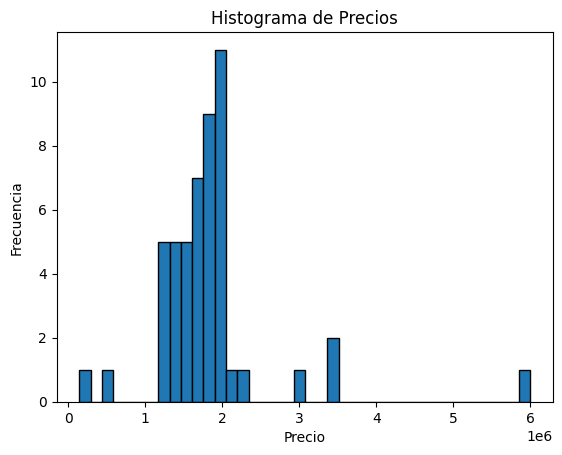

In [4]:
#Ejercicio 3

import matplotlib.pyplot as plt
import numpy as np

#para poder visualizarlo 
%matplotlib inline

plt.hist(df_precios['Precio'], bins=40, edgecolor='black')  
plt.title('Histograma de Precios')
plt.xlabel('Precio')        # muestra los precios multiplicados por 1 millón
plt.ylabel('Frecuencia')
plt.show()

#A simple vista hay 6 outliers; 2 items muy baratos y 4 items demasiado caros. El precio de la mayoria de los items ronda entre 1 y 2 millones de pesos. 

In [5]:
#Ejercicio 4

In [6]:
#------------------Parte B-------------------#

In [7]:
#Ejercicio 5